In [2]:
import os
for dirname, _, filenames in os.walk('kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header = None)
test_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', header = None)

## Balance the Dataset ##

In [8]:
train_df[187] = train_df[187].astype(int)
equilibre = train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


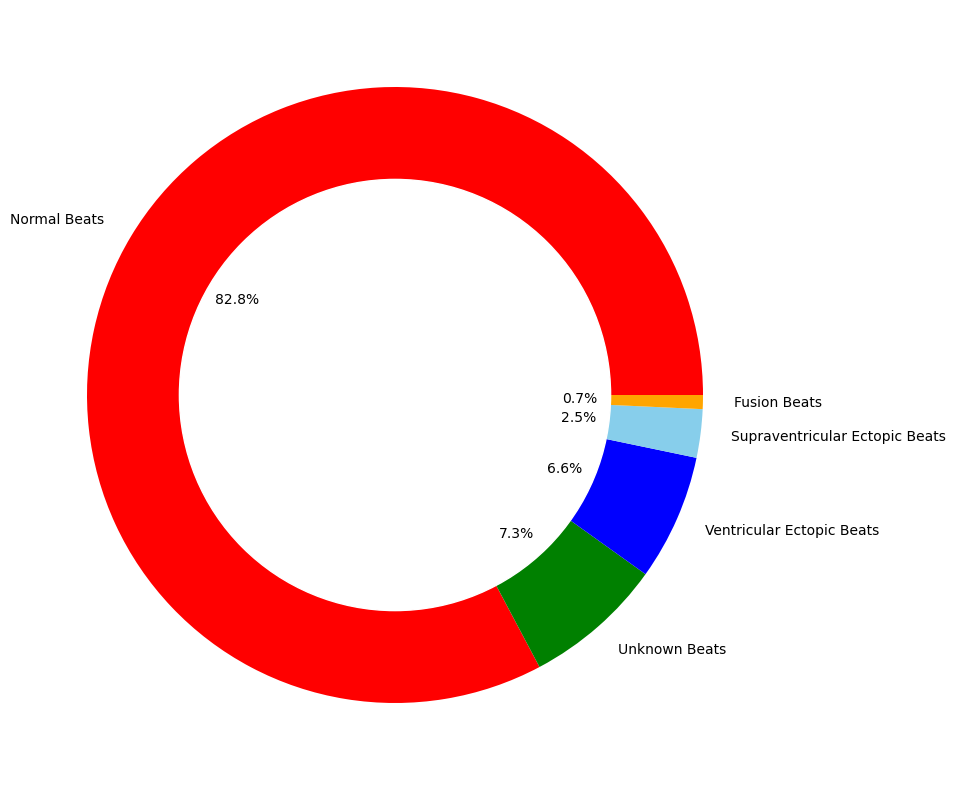

In [9]:
plt.figure(figsize=(20,10))
my_circle = plt.Circle( (0,0), 0.7, color = 'white')
plt.pie(equilibre, labels = ['Normal Beats', 'Unknown Beats', 'Ventricular Ectopic Beats', 'Supraventricular Ectopic Beats', 'Fusion Beats'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [10]:
from sklearn.utils import resample
df_1 = train_df[train_df[187]==1]
df_2 = train_df[train_df[187]==2]
df_3 = train_df[train_df[187]==3]
df_4 = train_df[train_df[187]==4]
df_0 = (train_df[train_df[187]==0]).sample(n=20000, random_state=42)

df_1_upsample = resample(df_1, replace = True, n_samples = 20000, random_state=123)
df_2_upsample = resample(df_2, replace = True, n_samples = 20000, random_state=124)
df_3_upsample = resample(df_3, replace = True, n_samples = 20000, random_state=125)
df_4_upsample = resample(df_4, replace = True, n_samples = 20000, random_state=126)

train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample,])

In [12]:
equilibre = train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


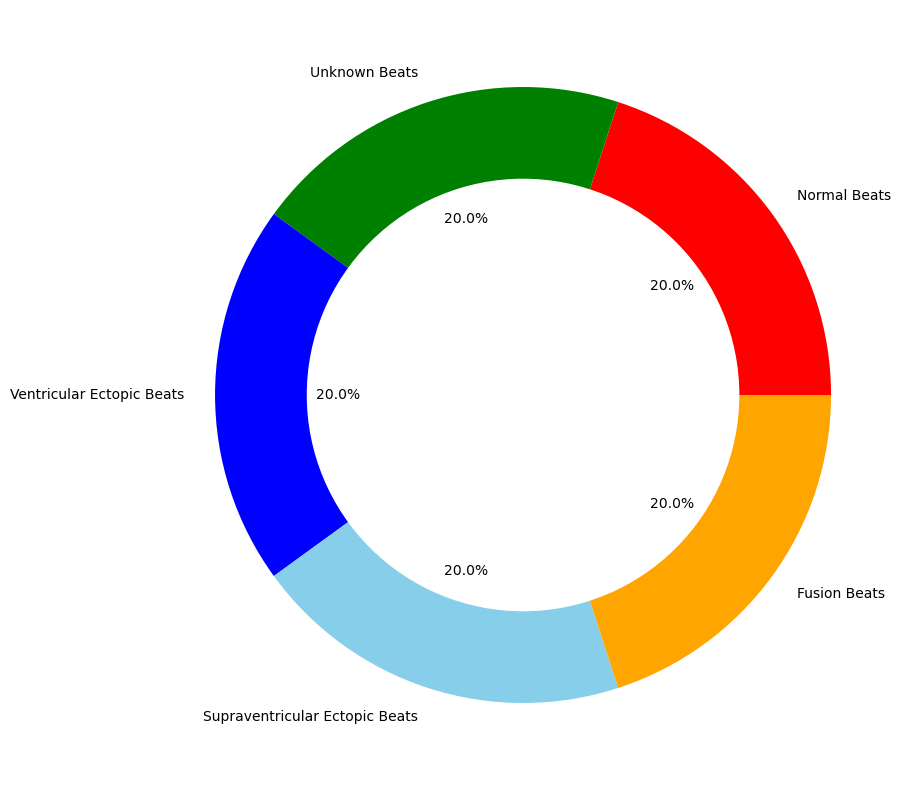

In [13]:
plt.figure(figsize=(20,10))
my_circle = plt.Circle( (0,0), 0.7, color = 'white')
plt.pie(equilibre, labels = ['Normal Beats', 'Unknown Beats', 'Ventricular Ectopic Beats', 'Supraventricular Ectopic Beats', 'Fusion Beats'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81192,0.736232,0.602899,0.524638,0.542029,0.469565,0.379710,0.310145,0.237681,0.147826,0.052174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
83696,0.790735,0.677316,0.581470,0.448882,0.311502,0.186901,0.121406,0.063898,0.087859,0.115016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
84803,0.793939,0.690909,0.577273,0.466667,0.340909,0.207576,0.128788,0.075758,0.054545,0.059091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
82876,0.977395,0.938644,0.889128,0.844995,0.779333,0.708288,0.607104,0.491927,0.384284,0.310011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


### **Classes**
*Analyse the Classes by one sample per class*

In [15]:
c = train_df.groupby(187, group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
24652,0.878151,0.600840,0.214286,0.134454,0.115546,0.123950,0.115546,0.111345,0.111345,0.117647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73333,1.000000,0.790026,0.146982,0.065617,0.199475,0.228346,0.230971,0.228346,0.207349,0.236220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
77093,0.000000,0.021016,0.155867,0.236427,0.313485,0.355517,0.409807,0.439580,0.467601,0.518389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80960,1.000000,0.810496,0.545189,0.246356,0.122449,0.153061,0.142857,0.119534,0.097668,0.093294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
83223,0.575472,0.468553,0.427673,0.405660,0.396226,0.377358,0.349057,0.305031,0.235849,0.119497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


***In the above output, one sample per class in printed***

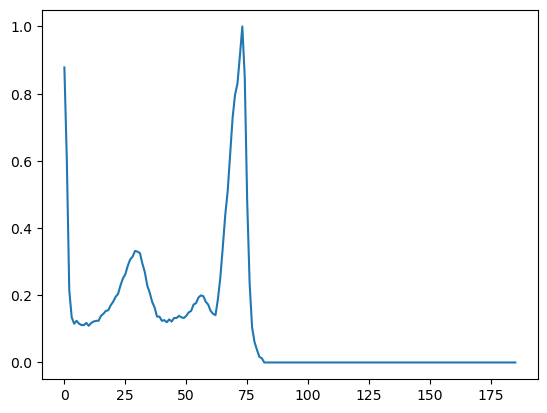

In [18]:
plt.plot(c.iloc[0, :186])

***This is a sample of a Normal Beat***

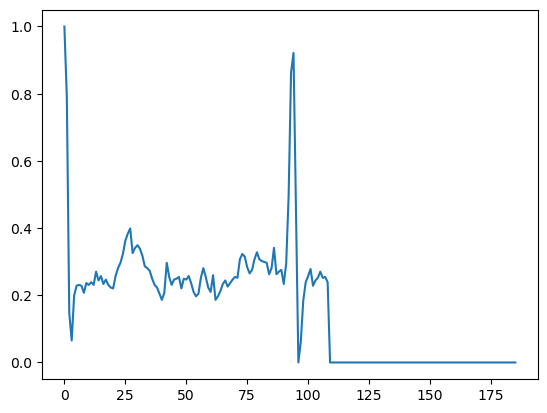

In [19]:
plt.plot(c.iloc[1, :186])

***This is a sample of Supraventricular Ectopic Beat***

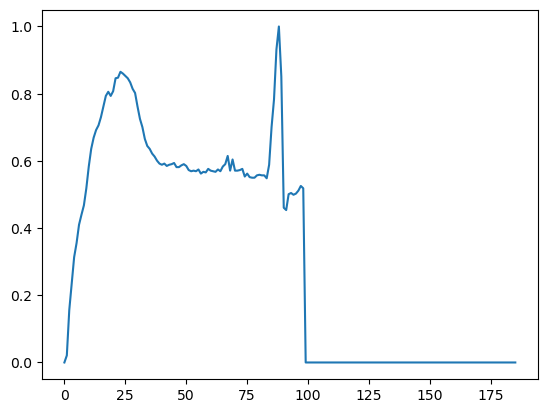

In [20]:
plt.plot(c.iloc[2, :186])

***This is a sample of Ventricular ectopic beat***

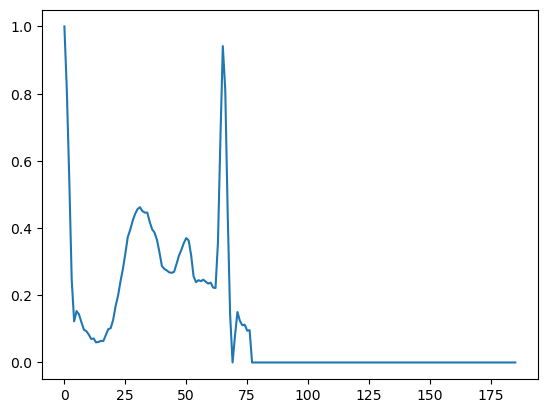

In [21]:
plt.plot(c.iloc[3, :186])

***This is a sample of Fusion Beat***

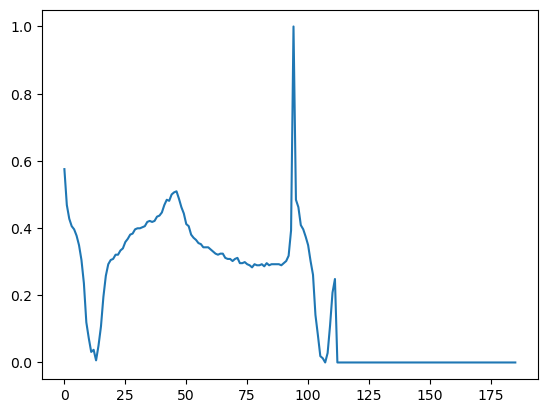

In [22]:
plt.plot(c.iloc[4, :186])

***This is a sample of Unknown Beats***

## **Pretreat**
***Add some noise to generalize the Data***

In [23]:
def add_gaussian_noise(signal):
    noise = np.random.normal(0, 0.5, 186)
    return (signal+noise)

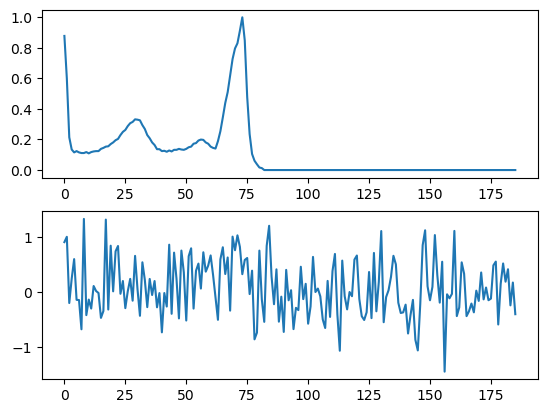

In [25]:
tempo = c.iloc[0, :186]
bruitter = add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(tempo)

plt.subplot(2,1,2)
plt.plot(bruitter)

plt.show()

In [26]:
target_train = train_df[187]
target_test = test_df[187]

y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

In [27]:
X_train = train_df.iloc[:, :186].values
X_test = test_df.iloc[:, :186].values

for i in range(len(X_train)):
    X_train[i, :186] = add_gaussian_noise(X_train[i,:186])

X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)

In [29]:
X_train

array([[[ 0.42952685],
        [ 0.33400985],
        [ 0.03708667],
        ...,
        [-0.43169461],
        [ 0.156255  ],
        [-0.78601437]],

       [[ 0.85717762],
        [ 1.02550682],
        [ 0.48808301],
        ...,
        [-0.24312383],
        [ 0.00997568],
        [ 0.3446389 ]],

       [[ 0.78443886],
        [ 0.74980207],
        [ 0.03701242],
        ...,
        [-0.7230652 ],
        [ 0.63762591],
        [-0.69662543]],

       ...,

       [[ 0.49464975],
        [ 0.99240758],
        [ 0.38904204],
        ...,
        [ 0.19376679],
        [ 0.06571913],
        [ 0.17819686]],

       [[ 1.39708283],
        [ 1.26862307],
        [ 1.15493312],
        ...,
        [ 0.44282328],
        [ 0.50189994],
        [ 0.3955408 ]],

       [[ 0.92109545],
        [ 0.27654103],
        [ 0.65167286],
        ...,
        [ 0.77988107],
        [ 1.43758492],
        [ 0.26610407]]])

In [30]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)